In [1]:
import scipy 
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import rv_continuous

import matplotlib.pyplot as plt


In [3]:
class pdf:
    def __init__(self,fun,*par):
            self.__par=par
            self.__fun=fun
    def __call__(self,fun,dataset):
            p=1.
            for d in dataset:
                p *= self.__fun.pdf(d)
            
class integrated_pdf(pdf):
    __par=[]
    __fun=None
    
    def __init__(self,fun,*par):
            self.__par=par
            self.__fun=fun

    def printf(self):
        print(self.__fun,self.__par)
        
    def __call__(self,dataset):
            p=self.__fun.pmf(dataset,self.__par)
            return p

## Example 0.0: build a binomial probability density function as an instance of an "integrated pdf" 

We build a binomial, although it is incorrectly labeled here "pdf":

The binomial IS a probability function! We can label the discrete pdfs as "integrated" pdfs over a range, but they are conceptually two different things. 

In scipy.stats they are two different classes:



In [4]:
        
class binom_pdf(integrated_pdf):
    name="binom_pdf"
    def __init__(self,*par):
            self.__par=par
            self.__fun=scipy.stats.binom #The functional part is an object of scipy, a binomial function

    def printf(self):
        print(self.__fun,self.__par)
         
    def __call__(self,dataset,verbose=False):
            p=-1
            if len(dataset)==1:
                if(verbose):print(self.__par, dataset[0])
                p=self.__fun.pmf(dataset[0],*self.__par)
            else:
                print("error! Dataset has size != 1")
            return p
        

In [5]:
n=10
p=0.5

binom_dataset=[5]

b1 = binom_pdf(n,p)
b1.printf()
print(b1(binom_dataset))

<scipy.stats._discrete_distns.binom_gen object at 0x7f0d98c2c580> (10, 0.5)
0.24609375000000003


# We can have an example of the binomial distribution by scanning over n:

We vary 

<BarContainer object of 10 artists>

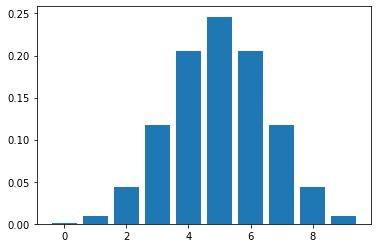

<Figure size 720x720 with 0 Axes>

In [6]:
probs = [b1([ni]) for ni in range(0,10)]
fig, ax = plt.subplots(1, 1)
plt.figure(figsize=(10,10))
ax.bar([ni for ni in range (0,10)],probs)


## Example 0.1: extended maximum likelihood

In [7]:
class extended_pdf(integrated_pdf,pdf):#nota bene: this class is still incomplete. 
                                       #This should take instances of pdf and integrated_pdf rather than classes. 
                                       #This is a temporary version for the scope of the exercise :) 
    __par=[]
    __fun=()
    __prob=0
    __nlprob=0
    def __init__(self,*fp):
            self.__fp=dict(fp)
    def printf(self):
        print("functions ",self.__fp.keys(),"\n arguments: ",self.__fp.values())


    def __call__(self,dataset):
            p=-1
            keylist=list(self.__fp.keys())
            if len(dataset)>0:
                f0=keylist[0]
                p0=(self.__fp[f0])
                #print("f0,",f0,"\n p0",p0, " n data ", len(dataset))

                p=f0.pmf(len(dataset),*p0)
            pnorm=p
            self.__nlprob=-2*np.log(pnorm)
            pshape=1
            if len(keylist)>1:
                 for f in range(1,len(keylist)):
                    pf=self.__fp[keylist[f]]
                    #print(*pf)
                    for d in range(0,len(dataset)):
                        xd=dataset[d]
                        #print(xd)
                        ploc=keylist[f].pdf(xd,*pf)
                        pshape=pshape*ploc
                        self.__nlprob=self.__nlprob-np.log(ploc)            

            
            p=p*pshape
            self.__prob=pnorm
            if (len(dataset)<1):
                print("error! Dataset has size < 1")
            
            return p, pnorm, pshape, self.__prob, self.__nlprob

# We generate a gaussian with the "rv_continuous" function "norm":

We take a gaussian with a mean $\mu$ = 1 and sigma $\sigma$ = 1

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html

the "RVS" method gives us a certain number off randomly generated points according to the functions:

We generate both according to the binomial AND according to the gaussian


510


(array([  3.,  18.,  25., 102., 148., 120.,  66.,  22.,   4.,   2.]),
 array([-2.4101181 , -1.69886989, -0.98762168, -0.27637347,  0.43487474,
         1.14612295,  1.85737116,  2.56861937,  3.27986758,  3.9911158 ,
         4.70236401]),
 <BarContainer object of 10 artists>)

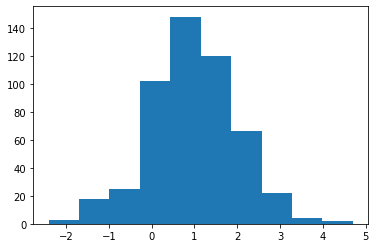

In [8]:
ngen=1000
pgen=0.5
mgen=1
sgen=1
ndata = binom.rvs(ngen,pgen)
print(ndata)
dataset=norm.rvs(1,1,ndata)
fig, ax = plt.subplots(1, 1)
ax.hist(dataset)

In [9]:
nguess=ngen
pguess=pgen
mguess=mgen
sguess=sgen

e1=extended_pdf((binom,(nguess,pguess)),(norm,(mguess,sguess)))
e1.printf()
e1(dataset)

functions  dict_keys([<scipy.stats._discrete_distns.binom_gen object at 0x7f0d98c2c580>, <scipy.stats._continuous_distns.norm_gen object at 0x7f0d99387be0>]) 
 arguments:  dict_values([(1000, 0.5), (1, 1)])


(5.977e-320,
 0.020656351649511996,
 2.89368e-318,
 0.020656351649511996,
 738.918995243395)

## Let's test a parameter scan:

If we want to find the maximum of this likelihood:

We can loop over the parameters in order to find the largest value - let us do it for two parameters right now:

1) The binomial probability p
2) The 

510
40 40


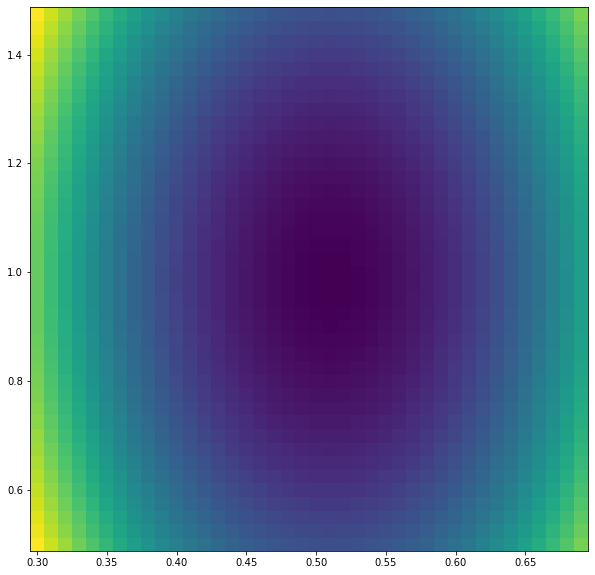

In [10]:

x= np.arange(0.3,0.7,0.01)
y= np.arange(0.5,1.5,0.025)
z = []

print(len(dataset))

for m in y:
    for p in x:
        #let's loop to find p and m (assumimng a guess for n total and s total)
        e1=extended_pdf((binom,(nguess,p)),(norm,(m,sguess)))
        nllv=e1(dataset)[4]
        z.append(nllv)
        #print (nllv)

print(len(x),len(y))
X,Y=np.meshgrid(x, y)
Z= np.array(z).reshape(len(y),len(x))


plt.figure(figsize=(10,10))
plt.pcolor(X, Y, Z)
plt.show()

the max is  991.2852777284893  at m =  1.0250000000000004  p =  0.49000000000000016


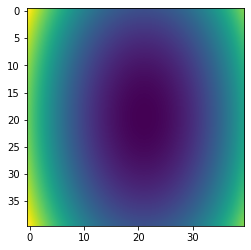

In [11]:
plt.imshow(Z, interpolation='bilinear')

ix,iy=np.unravel_index(Z.argmin(),Z.shape)

print("the max is ",Z.max(), " at m = ",y[iy]," p = ",x[ix])